In [29]:
import numpy as np

def f(x):
    return x**2 - 1

def Gauss(points):
    guesses = np.linspace(3,4*points-1,points) / (4*points+2) #Initial guesses for where the zeros are.
    x = np.cos(3.14*guesses+1 / (8*(N**2)*np.tan(guesses)) ) #Get ourselves
    d = 1
    precision = .000000001 #The more zeros this has, the more accurate the output
    
    while d > precision: #Second term is our margin of how small we want to get. The smaller, the more precise.
        Pm = np.copy(x)
        Pl = np.ones(points)
        
        for i in range(1, points): #Do it for each guess
            Pl, Pm = Pm, (Pm*(2*i+1)*x - Pl*i) / (i+1)
        
        dx = Pm / (points+1)*(Pl-Pm*x) / (1-x**2)
        x -= dx
        d = np.max(abs(dx))
        
    weights = 2*((points+1)**2) / (points**2 * (1-x**2) * ((points+1)*(Pl-Pm*x) / (1-x**2))**2) #Solve for weights
    #I haven't learned linear algebra yet, but basically you solve for all the w's so you can weight each point.
    
    return x, weights

points = 3
start, end = 0, 2

x, weights = Gauss(N)
x_points = 0.5*((b-a)*x + (b+a))
weighted_points = 0.5*(b-a)*weights

total = 0.0
for i in range(points):
    total += weighted_points[i] * f(x_points[i])
print(s)


0.6666666590949625


A brief overview of Gaussian Quadrature invloves three things: Legendre polynomials, weighting points, and integration. The most complicated of these, I would say, is the first one since it invloves so many concepts outside of the scope of this class and is somewhat beyond my current mathematical understanding. That's no need to fear, though; after all, I could still understand this well enough to do a project on it.
Anyways, What you need to know about Legendre polynomials is that they have this special property called "orthogonality", where basically whenever you multiply two functions that are orthogonal to each other you get zero. If that sounds a little abstract to you, then just think back to how you always get zero whenever you dot product two orthogonal vectors. Additionally, each of these Legendre polynomials are orthogonal to all their brethren of a lesser degree:

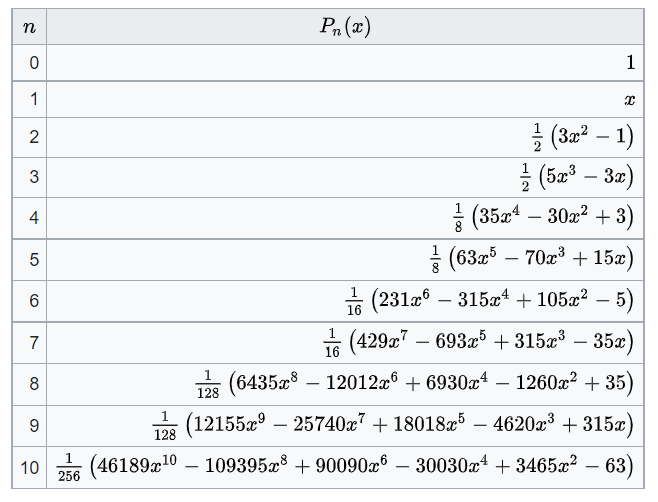

Secondly, we have the weights, which we need for each point to have considered it duly. For example, if you consider a bunch of basic equations increasing in power like y = 1, y = x, y = x^2, y = x^3, find the integrals of those equations across some bounds, like from -1 to 1, and represent that all witha few matrices, you'll get something that looks like this:

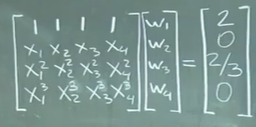

Continuing onwards, you solve for the w's to find the proper weights for each point.
For the final act, we decompose our arbitrary Legendre function into something like this:

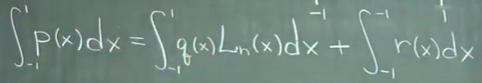

Where the p(x) on the far left is our full Legendre function, the q(x) and L_n(x) are the smaller Legendre functions, and r(x) is basically the leftovers.
But wait! This is where that first act comes in. Since the decomposed Legendre functions are of different degrees, we know they're orthogonal to each other and they multiply to zero, allowing us to cancel them out! So we're left with an equation that looks like this:

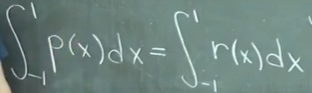

And at this point, we're basically there! Apply each point (which is chosen by the zeros of your particular Legendre function) into the r function, multiply by the appropriate weights, add them up, and you'll have your approximation. Just don't do it for more than 2n-1 points, because Gaussian Quadrature is anything but reliable past that point.